# 矩形脉冲波长的占空比

此示例说明如何创建矩形脉冲波形并测量其占空比。您可以将矩形脉冲波形想象成一系列的开启和关闭状态。一个脉冲周期是一个开启和关闭状态的总持续时间。脉冲宽度是开启状态的持续时间。占空比是脉冲宽度与脉冲周期的比率。矩形脉冲的占空比描述脉冲处于开启状态的时间占一个脉冲周期的比率。

创建一个以 1 千兆赫采样的矩形脉冲。脉冲处于开启状态（即等于 1），持续时间为 1 微秒。如果脉冲处于关闭状态（即等于 0），持续时间为 3 微秒。脉冲周期为 4 微秒。绘制波形。

In [2]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [32]:
Fs =1e9
t = np.linspace(0,4e-5,40001)

使用scipy.signal.square函数创建周期方波
如本示例中，采样hz为1e9，采样400001个点。创建的方波周期为4微秒，250000赫兹

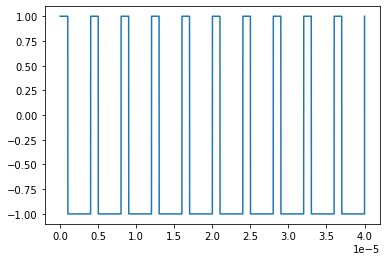

In [4]:
x = sig.square(2*np.pi*250000*t,duty=0.25)
plt.plot(t,x)
x = np.array(x)
#也就是说，这里面一共是t个点，也就是采样率为100
#然后频率为2，这样就会采集到2个周期

findEdge(x)用于寻找周期方波的切换边沿，输入方波序列，返回c，d。c为上升沿，d为下降沿

In [5]:
def findEdge(x):
    c = []
    d = []
    for i in range(len(x)-1):
        if(x[i]==-1 and x[i+1]==1 ):
            c.append(i)#从-1变为1的点
        if(x[i]==1 and x[i+1]==-1):
            d.append(i)#从1变为-1的点
    print(len(c),len(d))
    return c,d 


以下部分为使用相应的函数并作出标注

10 10


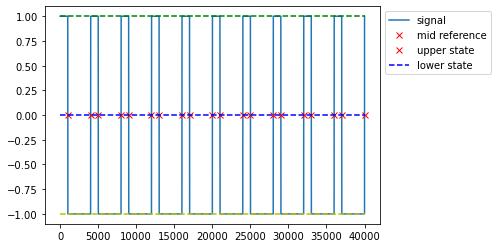

In [31]:
pos,neg = findEdge(x)
#plt.figure(figsize= [5,5])
plt.plot(x)
plt.plot(np.array(pos),np.zeros(len(pos)),'x',color = 'r')
plt.plot(np.array(neg),np.zeros(len(pos)),'x',color = 'r')
plt.plot([0,40000],[0,0],'--',color = 'b')
plt.plot([0,40000],[1,1],'--',color = 'g')
plt.plot([0,40000],[-1,-1],'--',color = 'y')
plt.legend(["signal","mid reference","upper state","lower state"],bbox_to_anchor = (1,1))

dutycycle为计算周期的函数。输入序列，能够返回出每一个周期的占空比

In [33]:
def dutycycle(x):
    pos,neg =findEdge(x)
    cycle = []
    precent = []
    duty = []
    for i in range(len(pos)-1):
        cycle.append(pos[i+1]-pos[i])
        precent.append(neg[i+1]-pos[i])
        duty.append(round(precent[i]/cycle[i],2))
    return duty

In [34]:
duty = dutycycle(x)
print(duty)

10 10
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]


In [37]:
def plotFig(x,t):
    plt.plot(t,x)
    duty = dutycycle(x)
    plt.title("Duty cycle  is {}".format(duty[0]))

10 10
10 10
10 10


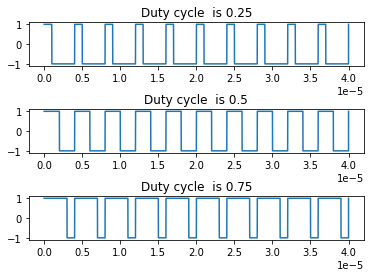

In [46]:

x = sig.square(2*np.pi*250000*t,duty=0.25)
y = sig.square(2*np.pi*250000*t,duty=0.5)
z = sig.square(2*np.pi*250000*t,duty=0.75)
plt.subplot(3,1,1)
plotFig(x,t)
plt.subplot(3,1,2)
plotFig(y,t)
plt.subplot(3,1,3)
plotFig(z,t)
plt.subplots_adjust(hspace=1)